In [ ]:
#Importing the required Libraries
import pandas as pd
import numpy as np
#import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

#plt.rcParams['figure.figsize'] = (16, 8)
#plt.style.use('fivethirtyeight')


import warnings
warnings.filterwarnings('ignore')


In [ ]:
import pandas as pd

# Provide the path to your Excel file
excel_file_path = '/content/final.xlsx'

# Read the Excel file into a pandas DataFrame
df = pd.read_excel(excel_file_path)

# Display the first few rows of the DataFrame
print(df.head())


          Date  Level  Flow  Kottayam
0  01 Jan 2015   0.56  8.05       0.0
1  02 Jan 2015   0.56  8.05       0.0
2  03 Jan 2015   0.56  8.02       0.0
3  04 Jan 2015   0.53  5.57       0.0
4  05 Jan 2015   0.43  2.85       0.0


In [ ]:
df.columns

Index(['Date', 'Level', 'Flow', 'Kottayam'], dtype='object')

In [ ]:
print('Shape of the Data: ', (df.shape))

Shape of the Data:  (2748, 4)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2748 entries, 0 to 2747
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      2748 non-null   object 
 1   Level     2748 non-null   float64
 2   Flow      2748 non-null   float64
 3   Kottayam  2748 non-null   float64
dtypes: float64(3), object(1)
memory usage: 86.0+ KB


In [ ]:
display("Total number of of Duplicates present in data: %s" %df.duplicated().sum())

'Total number of of Duplicates present in data: 0'

In [ ]:
print("Number of Missing Values in our data set\n")
missing_df = df.isnull().sum().to_frame().reset_index().rename({"index" : 'Variable', 0: 'Missing Values'}, axis =1)


Number of Missing Values in our data set



In [ ]:
df.describe()


,Level,Flow,Kottayam
count,2748.000000,2748.000000,2748.000000
mean,1.135473,42.852052,10.517067
std,1.316160,207.928944,108.428067
min,0.000000,0.000000,0.000000
25%,0.130000,0.000000,0.000000
50%,0.700000,0.000000,0.000000
75%,1.740000,31.912500,4.600000
max,9.400000,7484.470000,3469.600000


In [ ]:
df.describe(include="object")

,Date
count,2748
unique,2748
top,01 Jan 2015
freq,1


In [ ]:
df.columns = df.columns.str.lower().str.replace(" ", "_")
df.head()

,date,level,flow,kottayam
0,01 Jan 2015,0.56,8.05,0.0
1,02 Jan 2015,0.56,8.05,0.0
2,03 Jan 2015,0.56,8.02,0.0
3,04 Jan 2015,0.53,5.57,0.0
4,05 Jan 2015,0.43,2.85,0.0


In [ ]:
import pandas as pd

# Assuming 'date_column' is your date feature
df['date'] = pd.to_datetime(df['date'])
df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year


In [ ]:
df

,date,level,flow,kottayam,day,month,year
0,2015-01-01,0.56,8.05,0.0,1,1,2015
1,2015-01-02,0.56,8.05,0.0,2,1,2015
2,2015-01-03,0.56,8.02,0.0,3,1,2015
3,2015-01-04,0.53,5.57,0.0,4,1,2015
4,2015-01-05,0.43,2.85,0.0,5,1,2015
...,...,...,...,...,...,...,...
2743,2022-07-07,0.00,0.00,0.0,7,7,2022
2744,2022-07-08,0.00,0.00,0.0,8,7,2022
2745,2022-07-09,0.00,0.00,0.0,9,7,2022
2746,2022-07-10,0.00,0.00,0.0,10,7,2022


In [ ]:
del df['date']

In [ ]:
df

,level,flow,kottayam,day,month,year
0,0.56,8.05,0.0,1,1,2015
1,0.56,8.05,0.0,2,1,2015
2,0.56,8.02,0.0,3,1,2015
3,0.53,5.57,0.0,4,1,2015
4,0.43,2.85,0.0,5,1,2015
...,...,...,...,...,...,...
2743,0.00,0.00,0.0,7,7,2022
2744,0.00,0.00,0.0,8,7,2022
2745,0.00,0.00,0.0,9,7,2022
2746,0.00,0.00,0.0,10,7,2022


In [ ]:
df.corr().style.background_gradient("copper_r")

,level,flow,kottayam,day,month,year
level,1.000000,0.209131,0.002054,0.020948,0.397292,-0.129509
flow,0.209131,1.000000,-0.007696,0.013509,0.156854,-0.100955
kottayam,0.002054,-0.007696,1.000000,-0.058544,-0.052821,0.039344
day,0.020948,0.013509,-0.058544,1.000000,0.010481,-0.008616
month,0.397292,0.156854,-0.052821,0.010481,1.000000,-0.098033
year,-0.129509,-0.100955,0.039344,-0.008616,-0.098033,1.000000


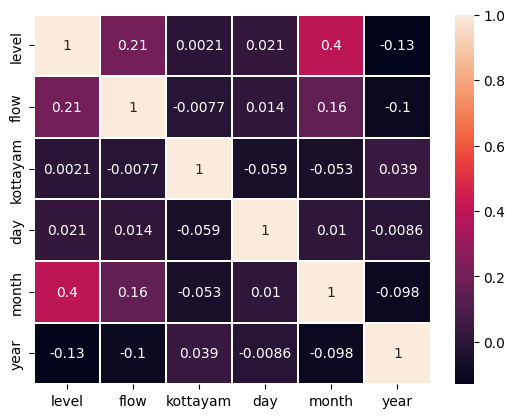

In [ ]:
sns.heatmap(df.corr(),annot = True, lw = 0.1);

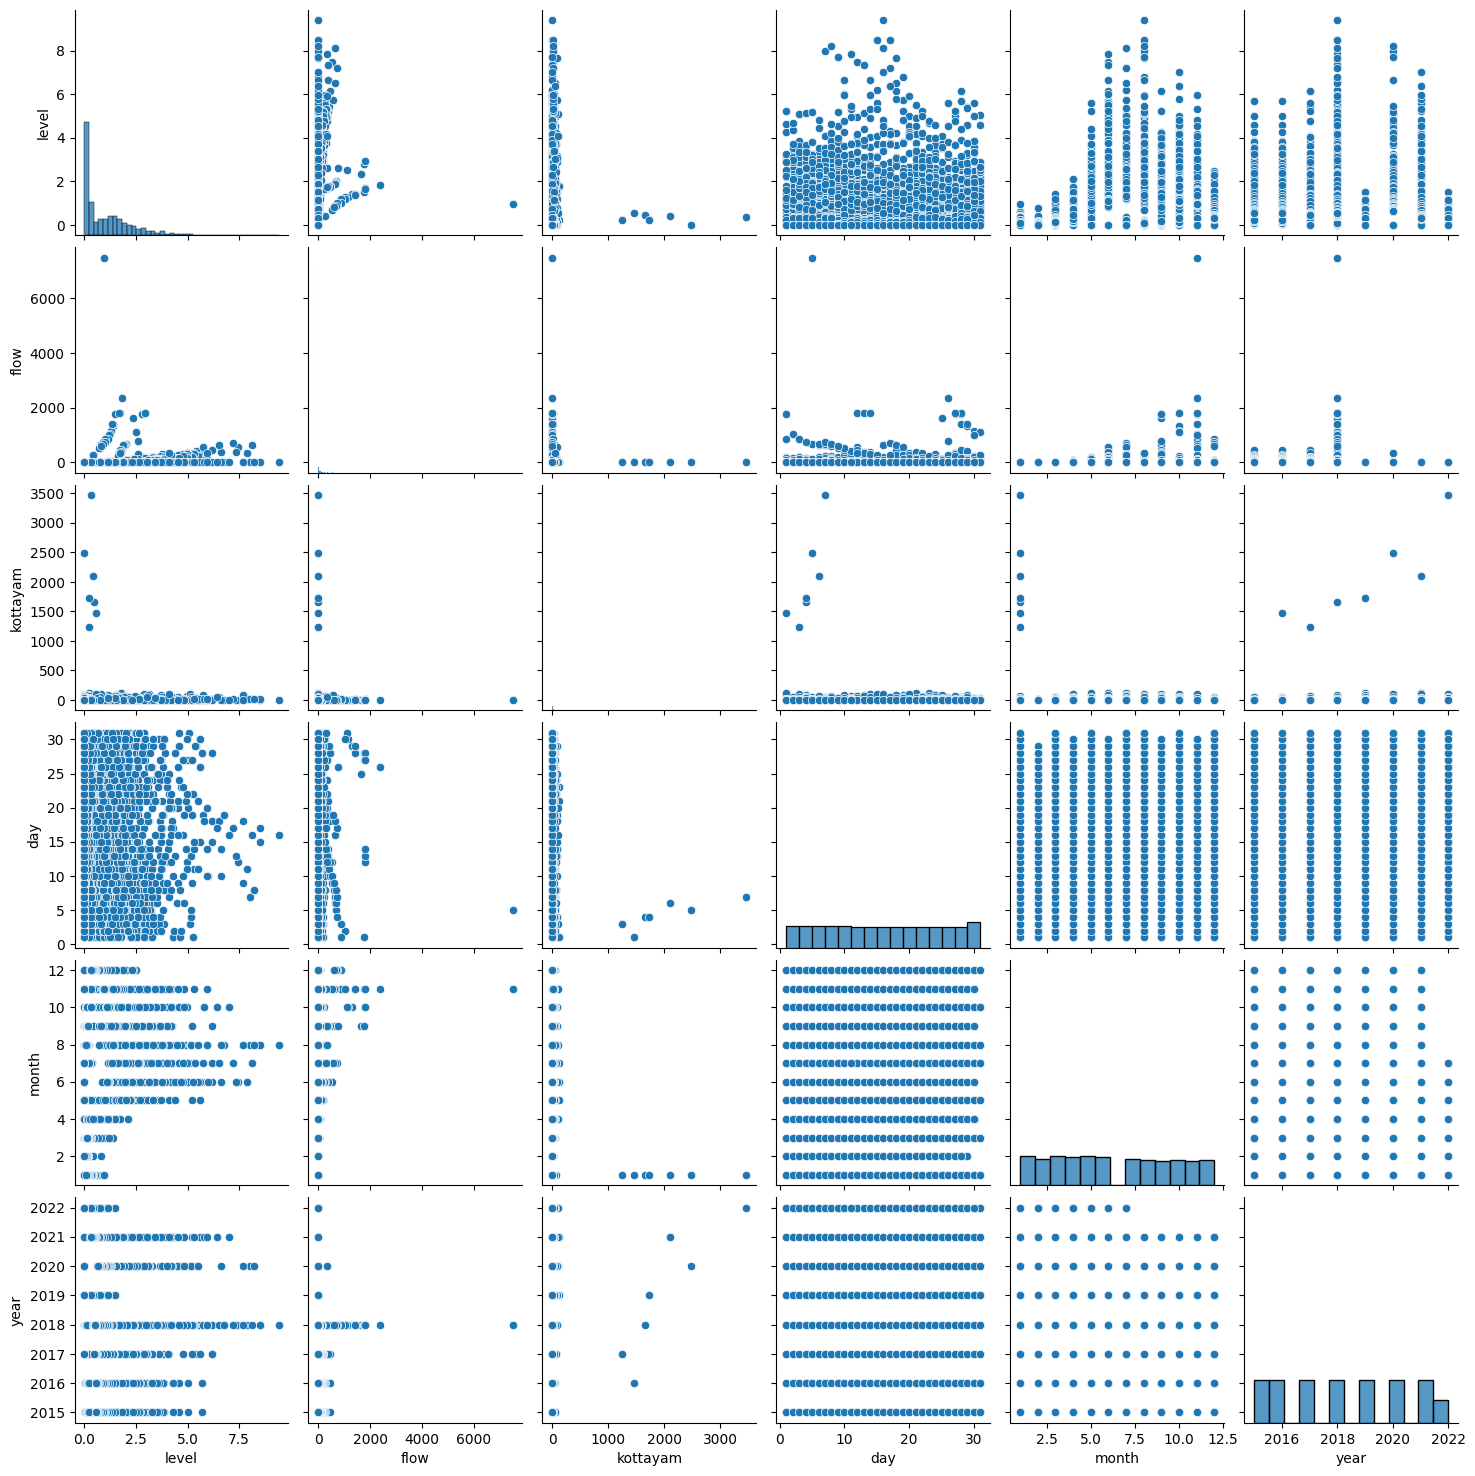

In [ ]:
sns.pairplot(df)

In [ ]:
df.head()


,level,flow,kottayam,day,month,year
0,0.56,8.05,0.0,1,1,2015
1,0.56,8.05,0.0,2,1,2015
2,0.56,8.02,0.0,3,1,2015
3,0.53,5.57,0.0,4,1,2015
4,0.43,2.85,0.0,5,1,2015


In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
for col in ['date']: df[col] = label_encoder.fit_transform(df[col])

In [ ]:
x = df[['day','month','year','flow','kottayam']]
y = df['level']

print(x.shape)
print(y.shape)

(2748, 5)
(2748,)


In [ ]:
y

0       0.56
1       0.56
2       0.56
3       0.53
4       0.43
        ... 
2743    0.00
2744    0.00
2745    0.00
2746    0.00
2747    0.00
Name: level, Length: 2748, dtype: float64

In [ ]:
df

,level,flow,kottayam,day,month,year
0,0.56,8.05,0.0,1,1,2015
1,0.56,8.05,0.0,2,1,2015
2,0.56,8.02,0.0,3,1,2015
3,0.53,5.57,0.0,4,1,2015
4,0.43,2.85,0.0,5,1,2015
...,...,...,...,...,...,...
2743,0.00,0.00,0.0,7,7,2022
2744,0.00,0.00,0.0,8,7,2022
2745,0.00,0.00,0.0,9,7,2022
2746,0.00,0.00,0.0,10,7,2022


In [ ]:


from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(x)


In [ ]:
df_scaled

array([[-1.66795233, -1.54997039, -1.50349256, -0.1674052 , -0.09701345],
       [-1.55432134, -1.54997039, -1.50349256, -0.1674052 , -0.09701345],
       [-1.44069036, -1.54997039, -1.50349256, -0.16754951, -0.09701345],
       ...,
       [-0.75890446,  0.195652  ,  1.70498124, -0.20612739, -0.09701345],
       [-0.64527347,  0.195652  ,  1.70498124, -0.20612739, -0.09701345],
       [-0.53164249,  0.195652  ,  1.70498124, -0.20612739, -0.09701345]])

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(2198, 5)
(2198,)
(550, 5)
(550,)


In [ ]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(x_train,y_train)

# calculating the accuracies
print("Training Accuracy :",lr_model.score(x_train,y_train))
print("Testing Accuracy :",lr_model.score(x_test,y_test))

Training Accuracy : 0.21623547833865175
Testing Accuracy : 0.0018214702505238156


In [ ]:
from sklearn.svm import SVR
svr_model=SVR(kernel = 'rbf')
svr_model.fit(x_train,y_train)

# calculating the accuracies
print("Training Accuracy :",svr_model.score(x_train,y_train))
print("Testing Accuracy :",svr_model.score(x_test,y_test))

Training Accuracy : 0.14727120134639515
Testing Accuracy : 0.13072836712939973


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Assuming you have already defined and split x_train, y_train, x_test, y_test

# Create and train the RandomForestRegressor model
rfc_model = RandomForestRegressor(n_estimators=300, random_state=0)
rfc_model.fit(x_train, y_train)

# Make predictions
y_train_pred = rfc_model.predict(x_train)
y_test_pred = rfc_model.predict(x_test)

# Calculate and print Mean Squared Error
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print("Training Mean Squared Error:", mse_train)
print("Testing Mean Squared Error:", mse_test)

# Calculate and print R-squared
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print("Training R-squared:", r2_train)
print("Testing R-squared:", r2_test)


Training Mean Squared Error: 0.03321027656505901
Testing Mean Squared Error: 0.17823643230707045
Training R-squared: 0.9806613891329968
Testing R-squared: 0.9000734326723304


In [ ]:
from sklearn.ensemble import RandomForestRegressor

rfc_model=RandomForestRegressor(n_estimators=300,random_state=0)
rfc_model.fit(x_train,y_train)

# calculating the accuracies
print("Training Accuracy :",rfc_model.score(x_train,y_train))
print("Testing Accuracy :",rfc_model.score(x_test,y_test))

Training Accuracy : 0.9806613891329968
Testing Accuracy : 0.9000734326723304


In [ ]:
num_features_used = rfc_model.estimators_[3].tree_.n_features
num_features_used

5

In [ ]:

import joblib




joblib.dump(rfc_model, 'rf_model.joblib')






['rf_model.joblib']

In [ ]:
rfc_model.save('flood_prediction_model_rfc.h5')

AttributeError: 'RandomForestRegressor' object has no attribute 'save'

In [ ]:
print(x_train.columns)

In [ ]:
# Import necessary libraries
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense


# Define the neural network model
model = Sequential()
model.add(Dense(10, input_dim=5, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae', 'mse'])

#model.compile(loss='mean_squared_error', optimizer='adam')

# Fit the model to the training data
model.fit(x_train, y_train, epochs=100, batch_size=10)

# Use the model to predict sales for the test data
predictions = model.predict(x_test)

# Evaluate the model's performance
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

Epoch 1/100
220/220 [==============================] - 3s 7ms/step - loss: 72436.6953 - mae: 191.0306 - mse: 72436.6953
Epoch 2/100
220/220 [==============================] - 1s 4ms/step - loss: 5111.4902 - mae: 29.6998 - mse: 5111.4902
Epoch 3/100
220/220 [==============================] - 1s 4ms/step - loss: 2364.5376 - mae: 23.0574 - mse: 2364.5376
Epoch 4/100
220/220 [==============================] - 1s 3ms/step - loss: 913.5950 - mae: 16.1308 - mse: 913.5950
Epoch 5/100
220/220 [==============================] - 0s 2ms/step - loss: 366.7644 - mae: 11.7893 - mse: 366.7644
Epoch 6/100
220/220 [==============================] - 0s 2ms/step - loss: 288.7550 - mae: 9.9863 - mse: 288.7551
Epoch 7/100
220/220 [==============================] - 1s 2ms/step - loss: 262.7643 - mae: 9.4747 - mse: 262.7643
Epoch 8/100
220/220 [==============================] - 0s 2ms/step - loss: 234.8863 - mae: 8.8988 - mse: 234.8863
Epoch 9/100
220/220 [==============================] - 0s 2ms/step - loss:

In [ ]:
# Normalize input features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Implement early stopping
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# Define the neural network model
model = Sequential()
model.add(Dense(10, input_dim=3, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Fit the model to the training data with early stopping
history = model.fit(x_train_scaled, y_train, epochs=100, batch_size=10, validation_data=(x_test_scaled, y_test), callbacks=[early_stopping])

# Use the model to predict sales for the test data
predictions = model.predict(x_test_scaled)

# Evaluate the model's performance
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)


In [ ]:
x_test_scaled

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Assuming y_test and predictions are the true labels and predicted labels respectively
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)  # RMSE is the square root of MSE
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)

In [ ]:
model.save('flood_prediction_model.h5')

In [ ]:
type(predictions)

In [ ]:
x_test

In [ ]:
# prompt: Using dataframe x_test: how to convert date format for prediction in model

import pandas as pd
# Convert the 'date' column to a datetime object
x_test['date'] = pd.to_datetime(x_test['date'])

# Extract the year, month, and day from the datetime object
x_test['year'] = x_test['date'].dt.year
x_test['month'] = x_test['date'].dt.month
x_test['day'] = x_test['date'].dt.day

# Drop the original 'date' column
x_test.drop('date', axis=1, inplace=True)


In [ ]:
predictions = model.predict(x_test_scaled)